In [1]:
# Importação de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets

# Importando as bibliotecas de machine learning
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler



In [2]:
'''Especificando o dataset a um objeto'''
df = pd.read_csv("Dataset.csv", dtype=str, low_memory=False)
df.describe()


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
count,16300,16300,16300,16300,16300,16300,16300,16300,16300,16300,...,16300,16300,16300,16300,16300,16300,16300,16300,16300,16300
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,S
freq,9374,10216,10207,10422,10166,9738,10072,16278,16284,16275,...,12108,16087,16237,8646,12087,8736,15972,16191,15902,12300


In [3]:
# Lidar com valores ausentes substituindo '?' por NaN
df.replace('?', pd.NA, inplace=True)

# Eliminar as linhas com valores ausentes
df.dropna(inplace=True)

# Dividir os dados em treinamento e teste
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Ajustar e transformar a variável alvo nos dados de treinamento
y_train_encoded = label_encoder.fit_transform(y_train)

# Transformar a variável alvo nos dados de teste (não ajustar novamente)
y_test_encoded = label_encoder.transform(y_test)

# Inicializar o classificador KNN
classificador = KNeighborsClassifier()

# Ajustar o classificador aos dados de treinamento
classificador.fit(X_train, y_train_encoded)

# Fazer previsões nos dados de teste
previsoes = classificador.predict(X_test)

# Calcular o relatório de classificação
relatorio = classification_report(y_test_encoded, previsoes)

# Calcular a precisão do modelo
precisao = accuracy_score(y_test_encoded, previsoes)

# Imprimir as previsões e a precisão do modelo
print("Previsões:", previsoes)
print("Precisão do Modelo:", precisao)


Previsões: [1 0 1 ... 1 0 1]
Precisão do Modelo: 0.9177914110429448


In [4]:
"""Normalização de dados"""

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicialização do classificador k-NN com ajuste de parâmetros
k = 5
classifier = KNeighborsClassifier(n_neighbors=k)

# Treinamento do modelo
classifier.fit(X_train_scaled, y_train_encoded)

# Realização de previsões
predictions = classifier.predict(X_test_scaled)

# Cálculo do relatório de classificação
report = classification_report(y_test_encoded, predictions)

# Cálculo da acurácia do modelo
accuracy = accuracy_score(y_test_encoded, predictions)

# Print das previsões e da acurácia
print("Predictions:", predictions)
print("Model Accuracy:", accuracy)

Predictions: [1 0 1 ... 1 0 1]
Model Accuracy: 0.9143558282208589


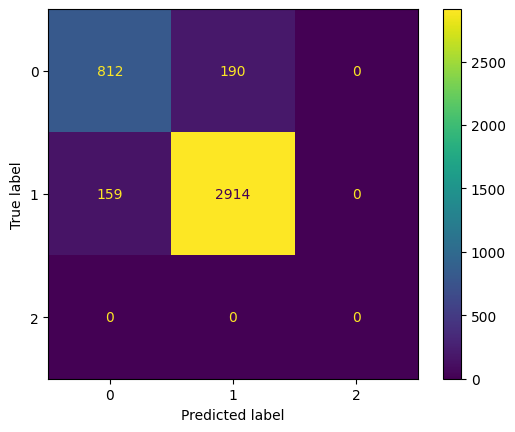

In [5]:
'''Matriz de Confusão'''

result = classifier.predict(X_test_scaled)
#print(confusion_matrix(y_test, result))

cm = confusion_matrix(y_test_encoded, result, labels=[0,1,2])
# pega o resultado em um objeto
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [6]:
print('Relatório de Classificação:')
print(relatorio)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1002
           1       0.94      0.95      0.95      3073

    accuracy                           0.92      4075
   macro avg       0.89      0.88      0.89      4075
weighted avg       0.92      0.92      0.92      4075

